Initial data analysis
* Basic Descriptor Stats
* Descriptor Ranges
* Descriptor Correlation
* PCA and clustering
* Euclidean distance to identify most different MOFs

In [1]:
import plotly
import pandas as pd
import chart_studio.plotly as py
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from bokeh.plotting import figure
from bokeh.models import HoverTool
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.spatial import distance

In [2]:
data = pd.read_csv("MOF_data_reduced.csv")
data_descriptors = data[list(data.columns)[1:]]

## Basic Descriptor Stats

In [3]:
def data_analysis_table(df):
    descriptor_stats = []
    for desc in list(df.columns):
        temp = []
        temp.append(desc)
        temp.append(min(df[desc]))
        temp.append(max(df[desc]))
        temp.append(np.mean(df[desc].tolist()))
        temp.append(np.median(df[desc].tolist()))
        temp.append(np.std(df[desc].tolist()))
        descriptor_stats.append(temp)
    descriptor_stats = pd.DataFrame(data=descriptor_stats,
                                    columns=["Descriptor", "Minimum", "Maximum", "Mean", "Median", "Std Dev"])
    descriptor_stats = descriptor_stats.round(3)
    return descriptor_stats

In [4]:
descriptor_stats = data_analysis_table(data_descriptors)
descriptor_stats

Descriptor  Minimum   Maximum      Mean    Median  Std Dev
0      PLD (log10)    0.580     1.854     0.726     0.688    0.135
1      LCD (log10)    0.602     1.855     0.846     0.806    0.154
2   Density (g/cc)    0.127     7.193     1.212     1.151    0.495
3      VSA (m2/cc)   38.048  4013.240  1244.823  1162.350  648.666
4              VF     0.284     0.943     0.584     0.571    0.108
5   DC_CH4 (log10)   -5.790    -2.160    -3.403    -3.390    0.409
6   DC_CO2 (log10)   -6.420    -2.660    -3.949    -3.840    0.529
7   DC_H2S (log10)   -6.870    -2.670    -3.965    -3.900    0.527
8          Qst_CH4  -42.966    -4.126   -18.525   -18.770    4.289
9          Qst_CO2  -84.691    -4.415   -30.790   -28.878    9.760
10         Qst_H2S  -87.161    -4.734   -31.119   -30.349    8.193
11         Qst_H2O -169.327    -3.312   -47.069   -41.357   30.701

## Descriptor Ranges

In [5]:
def data_analysis_graphs(df):
    descriptor_names = list(df.columns)
    title_names = []
    for f in descriptor_names:
        title_names.append(f)
    for n in range(len(title_names)):
        if len(title_names[n]) > 25:
            title_names[n] = title_names[n][0:24]
    fig = make_subplots(rows=math.ceil(len(descriptor_names)/3), cols=3, subplot_titles=title_names,
                        horizontal_spacing=0.06)
    for desc in range(len(descriptor_names)):
        if (desc + 1) % 3 == 1:
            fig.add_trace(go.Histogram(x=df[descriptor_names[desc]], marker=dict(color="#1f77b4")),
                          row=math.ceil((desc+1)/3), col=1)
        if (desc + 1) % 3 == 2:
            fig.add_trace(go.Histogram(x=df[descriptor_names[desc]], marker=dict(color="#1f77b4")),
                          row=math.ceil((desc+1)/3), col=2)
        if (desc + 1) % 3 == 0:
            fig.add_trace(go.Histogram(x=df[descriptor_names[desc]], marker=dict(color="#1f77b4")),
                          row=math.ceil((desc+1)/3), col=3)
    fig.update_layout(width=1000, height=500*(math.ceil(len(descriptor_names)/3)), showlegend=False)
    fig.update_traces(hovertemplate="Range: %{x}<br>Frequency: %{y}<extra></extra>")
    fig.update_annotations(font_size=12)
    fig.show()

In [6]:
data_analysis_graphs(data_descriptors)

## Descriptor Correlation

In [7]:
def plot(n1,n2):
    fig = plt.figure(figsize=(4.5,4.5))
    x=list(data[n1])
    x=[float(i) for i in x]
    y=list(data[n2])
    y=[float(i) for i in y]
    plt.scatter(x,y,color="black")
    plt.title(n1 + " vs " + n2)
    plt.xlabel(n1)
    plt.ylabel(n2)
    plt.show()

In [8]:
def corr_graph(Data,title):
    #get correlation table
    corr=Data.corr()
    #convert to R^2
    corr=corr.pow(2)
    col_names=Data.dtypes.index
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='Reds', vmin=0, vmax=1)
    cb=fig.colorbar(cax,shrink=0.825)
    cb.ax.tick_params(labelsize=9)
    ticks = np.arange(0,len(Data.columns),1)
    ax.set_xticks(ticks)
    #plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(col_names,fontsize=8)
    ax.set_yticklabels(col_names,fontsize=8)
    ax.xaxis.set_tick_params(rotation=90)
    plt.ylim(len(Data.columns)-0.5,-0.5)
    #y parameter move title up to be legible
    #ax.set_title(title,y=1.15,fontsize=12)
    #Find descriptors with R^2 > 0.9
    corr=Data.corr()
    corr=corr.pow(2)
    #using numpy, get values
    arr = corr.values
    index_names = corr.index
    col_names = corr.columns

    #  Get indices where such threshold is crossed; avoid diagonal elems
    R,C = np.where(np.triu(arr,1)>0.2)
    # Arrange those in columns and put out as a dataframe
    out_arr = np.column_stack((index_names[R],col_names[C],arr[R,C]))
    df_corr = pd.DataFrame(out_arr,columns=[['row_name','col_name','R2']])
    plt.tight_layout()
    plt.show()
    return(df_corr)

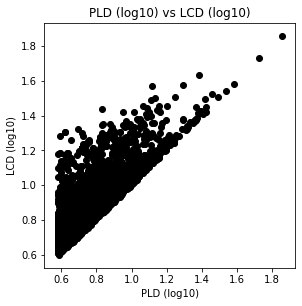

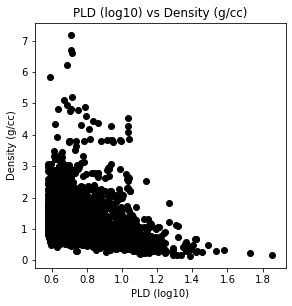

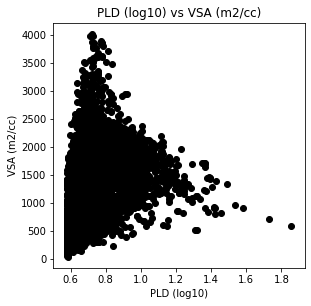

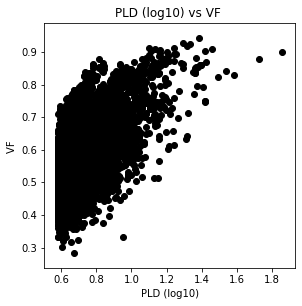

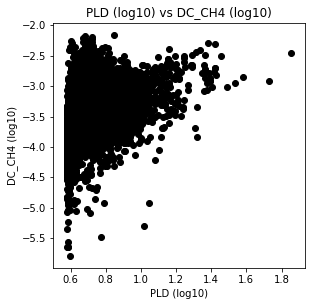

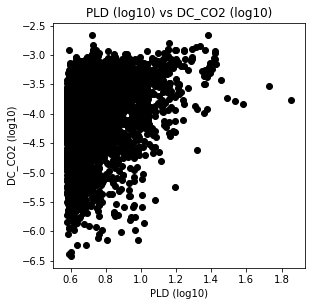

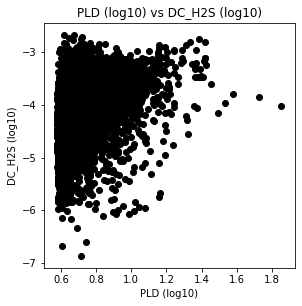

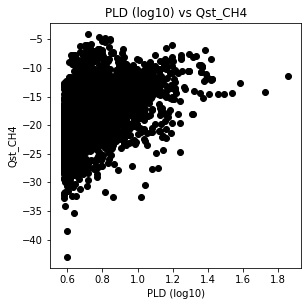

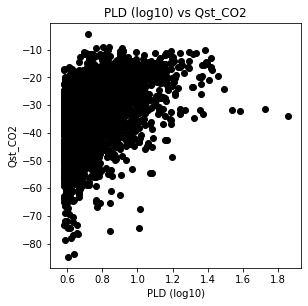

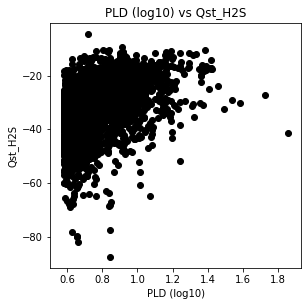

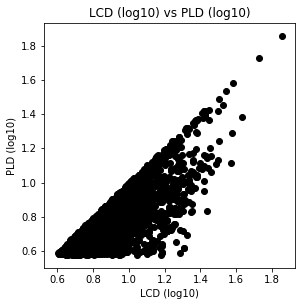

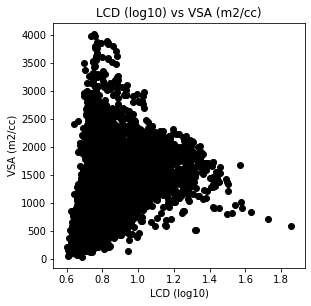

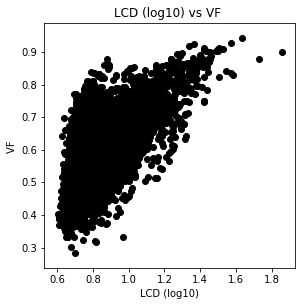

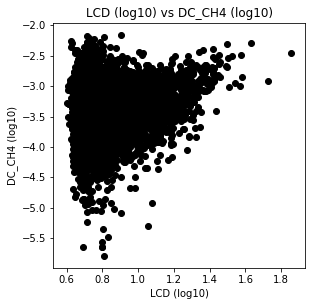

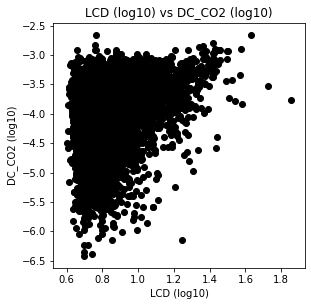

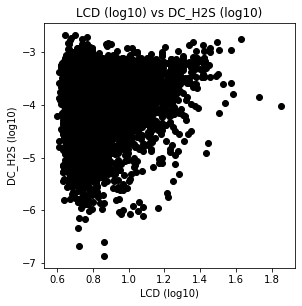

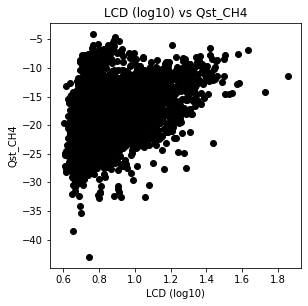

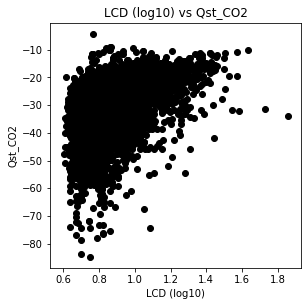

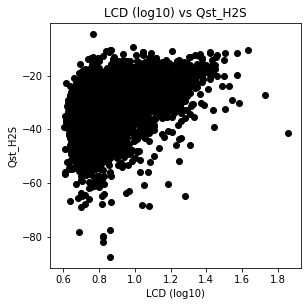

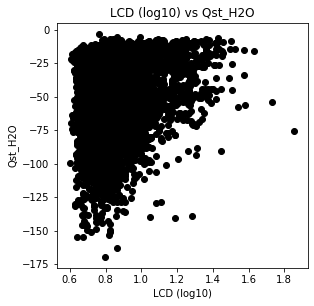

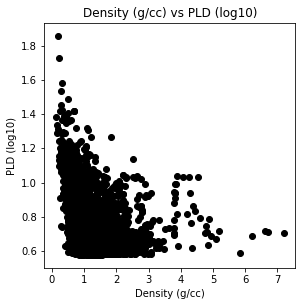

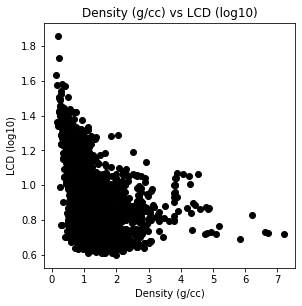

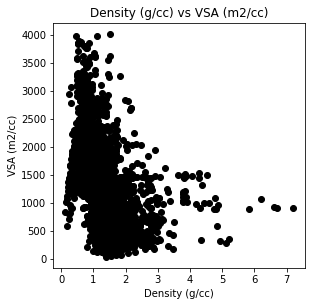

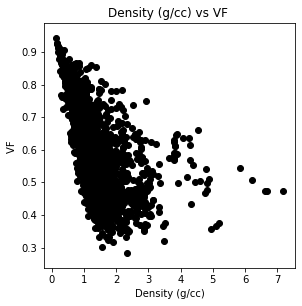

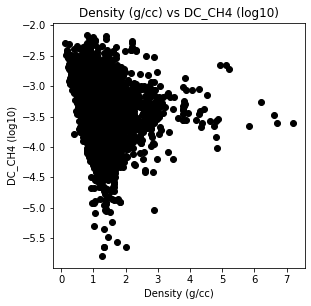

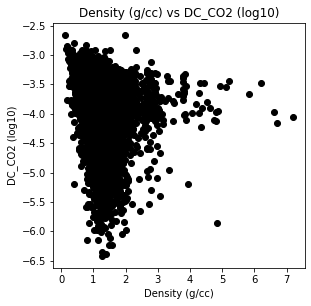

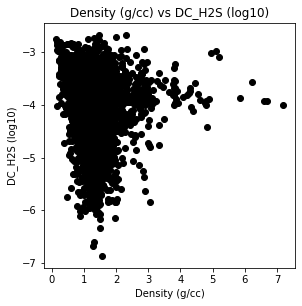

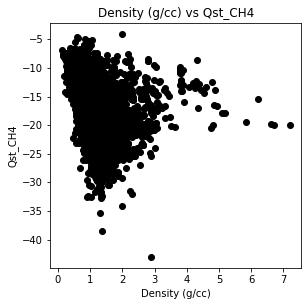

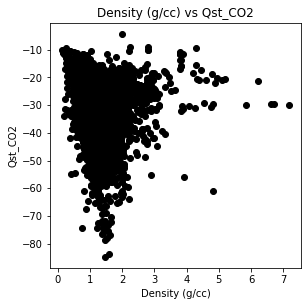

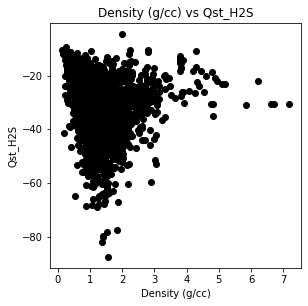

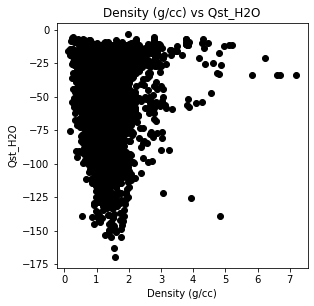

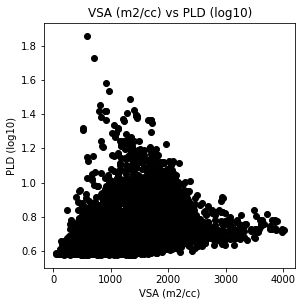

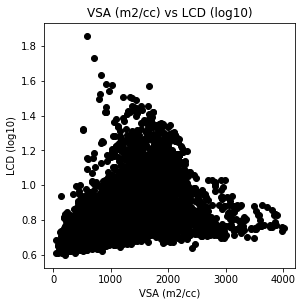

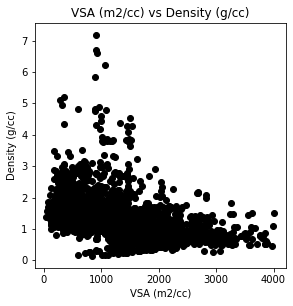

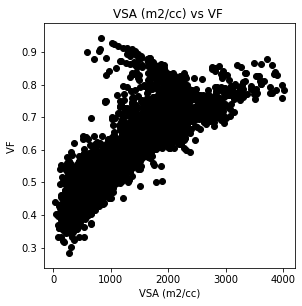

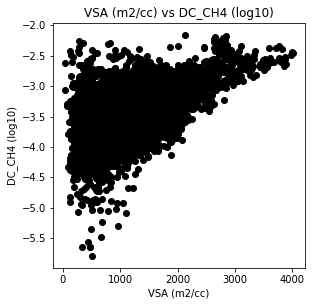

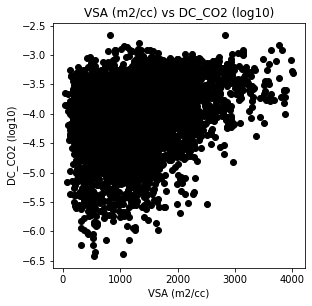

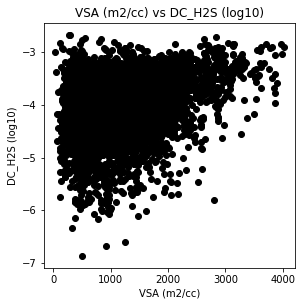

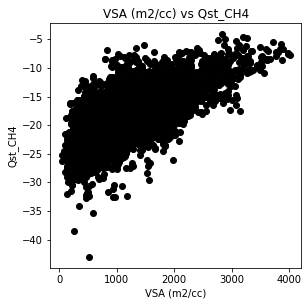

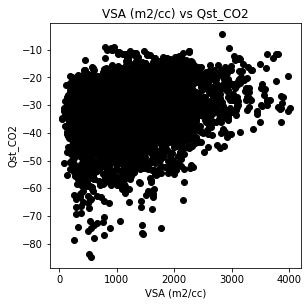

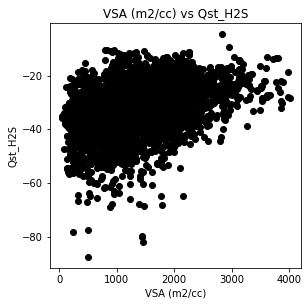

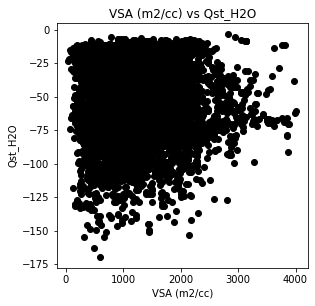

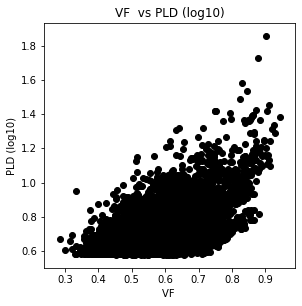

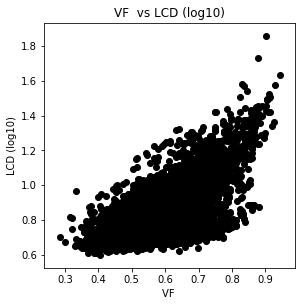

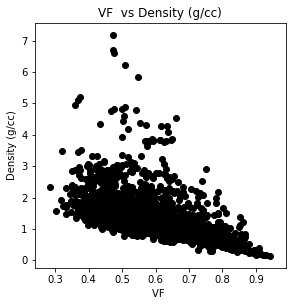

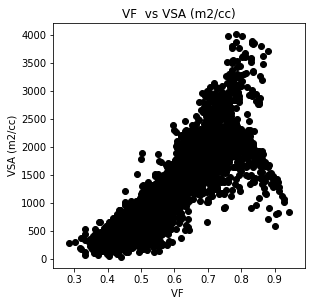

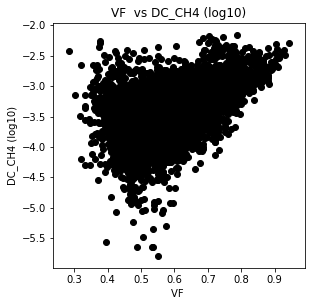

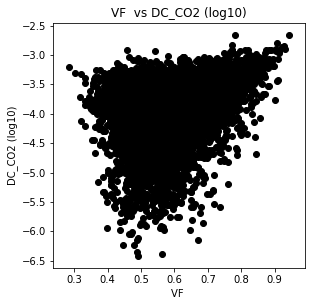

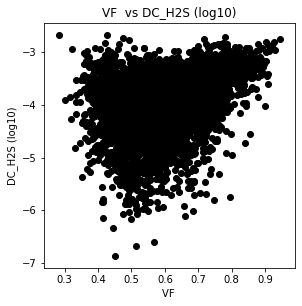

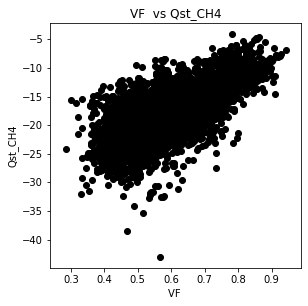

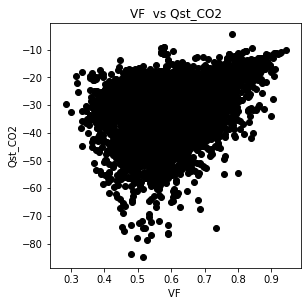

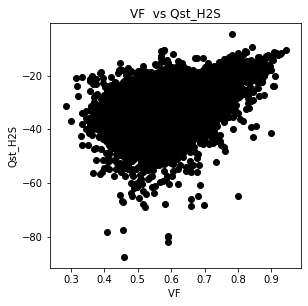

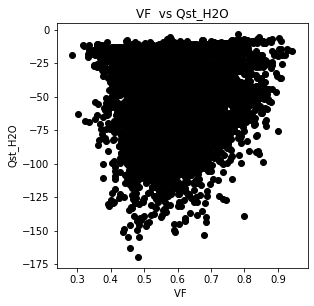

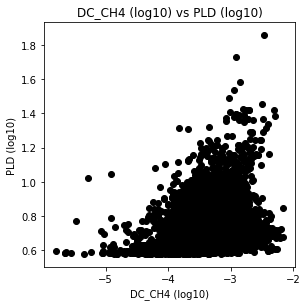

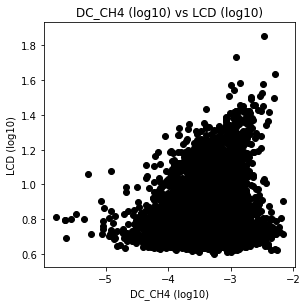

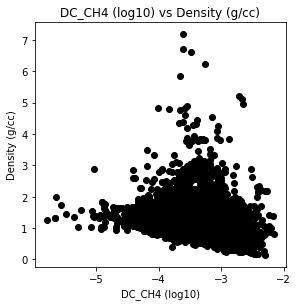

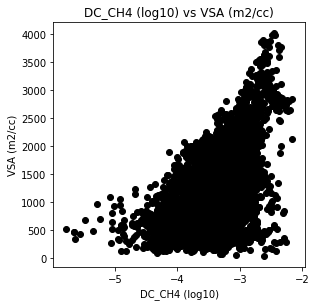

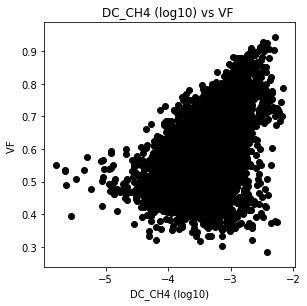

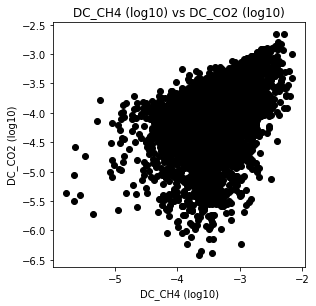

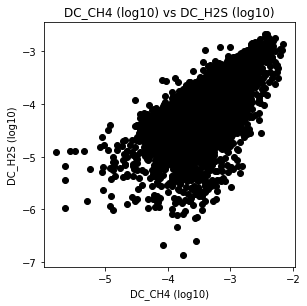

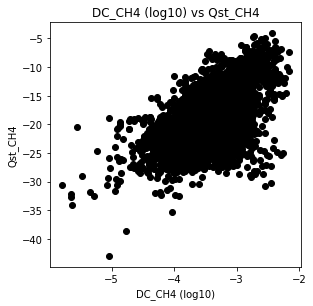

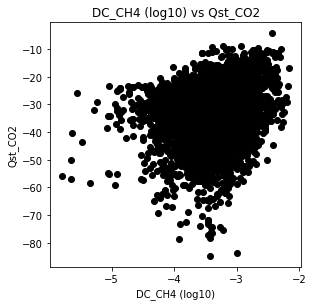

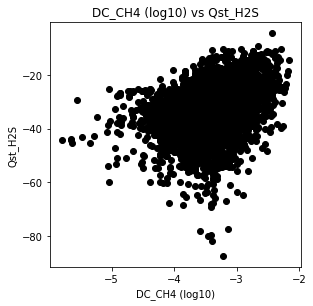

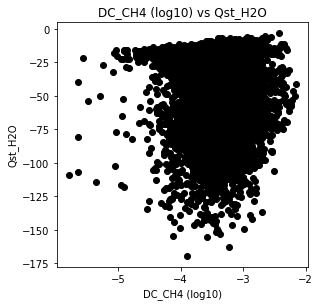

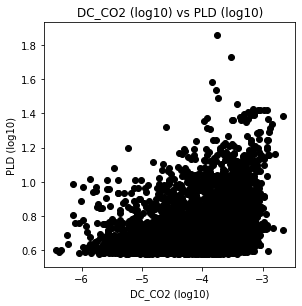

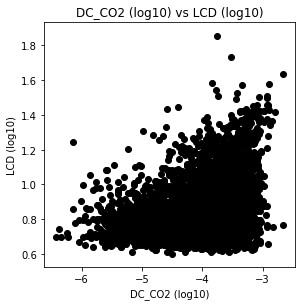

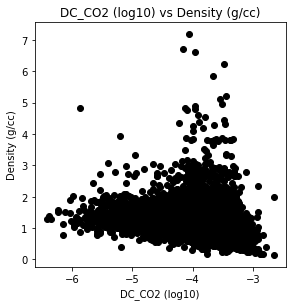

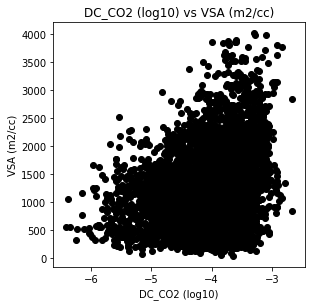

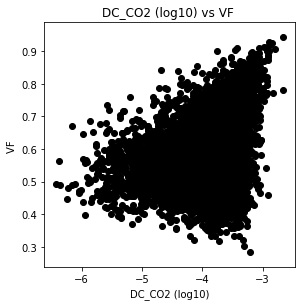

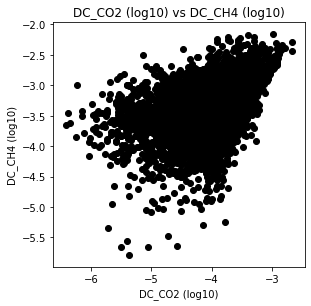

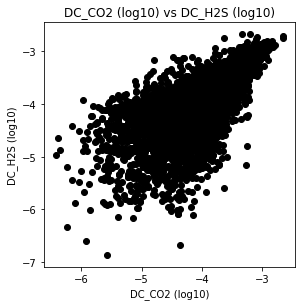

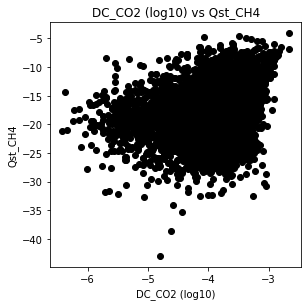

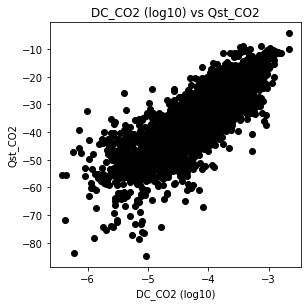

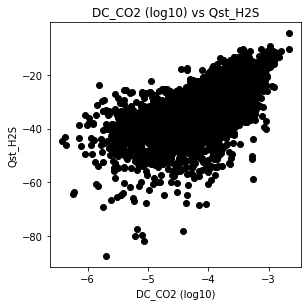

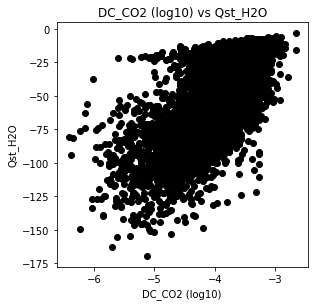

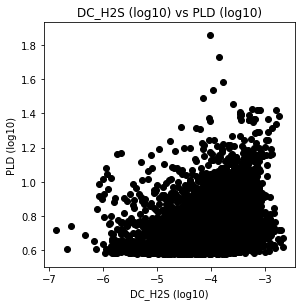

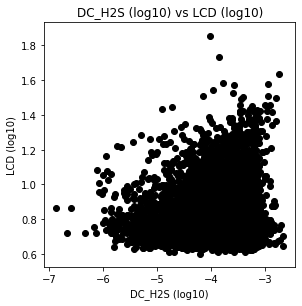

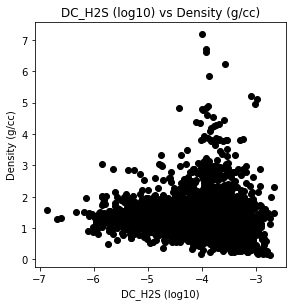

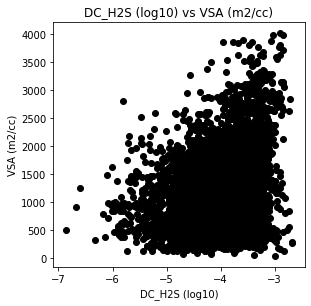

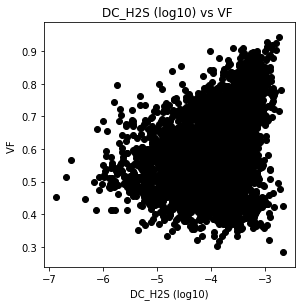

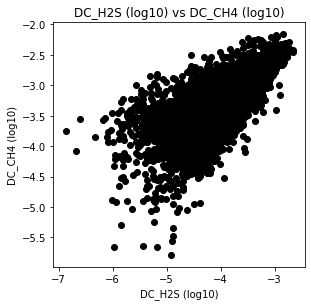

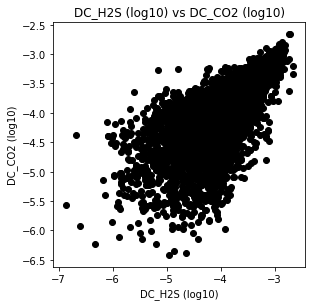

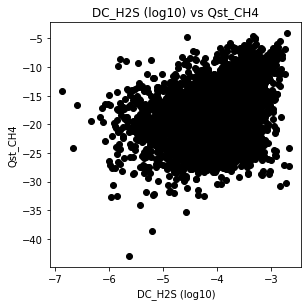

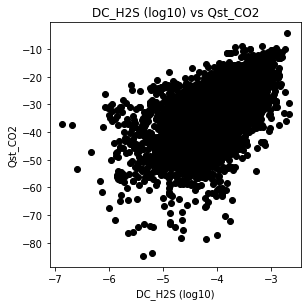

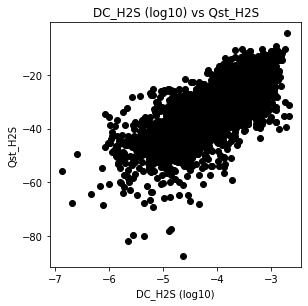

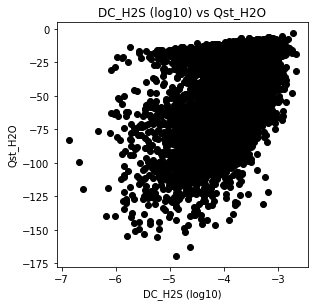

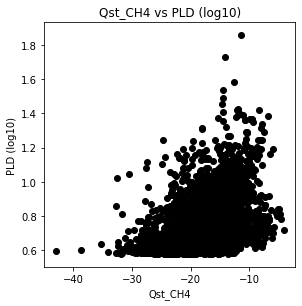

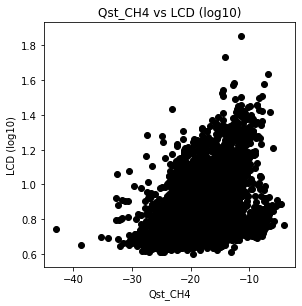

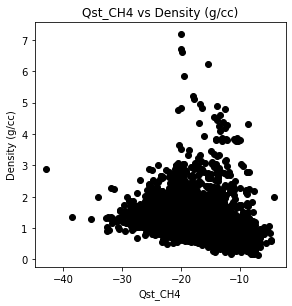

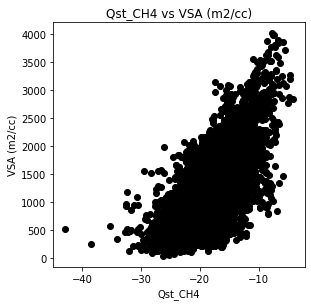

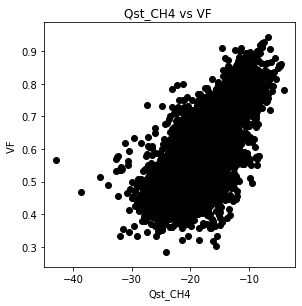

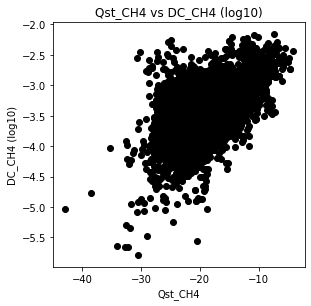

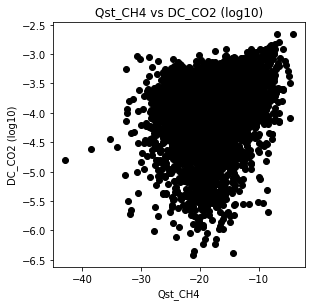

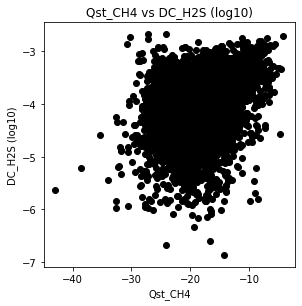

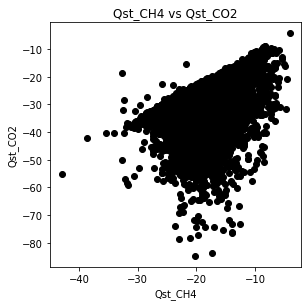

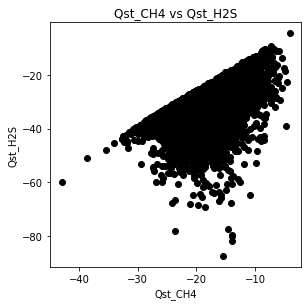

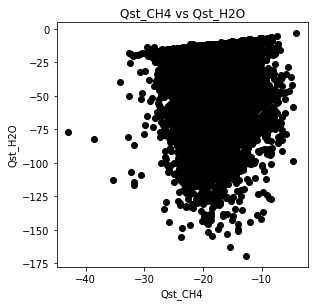

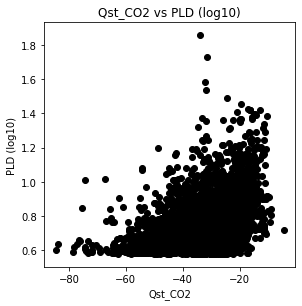

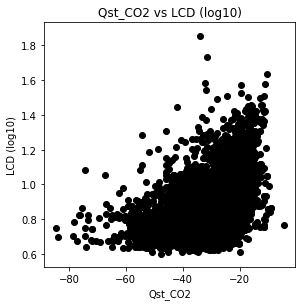

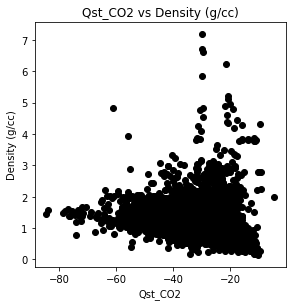

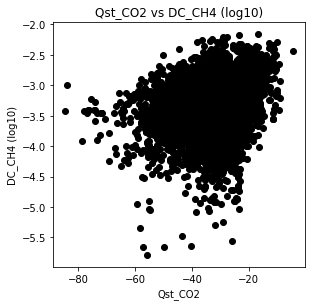

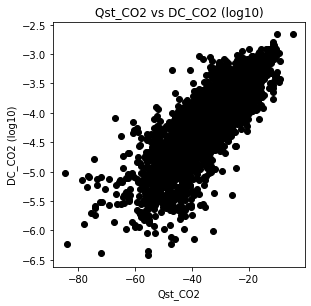

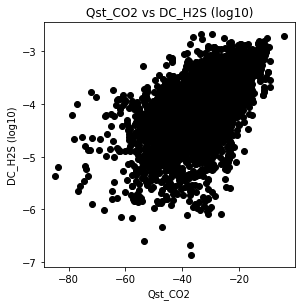

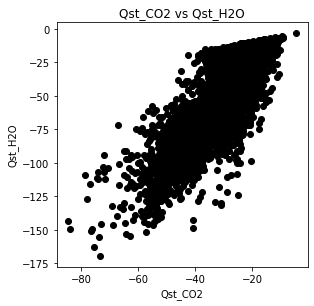

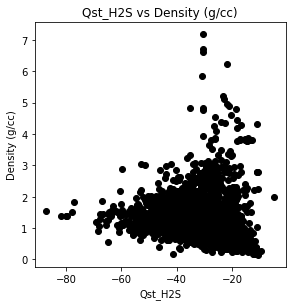

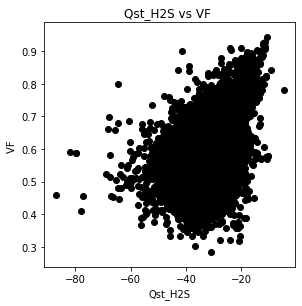

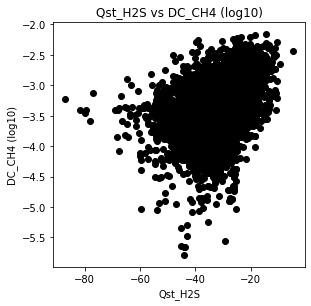

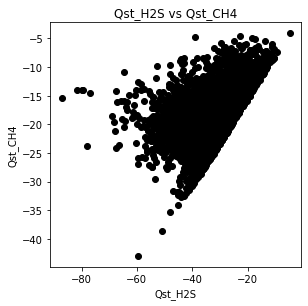

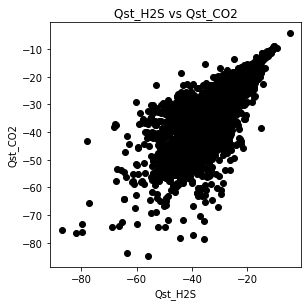

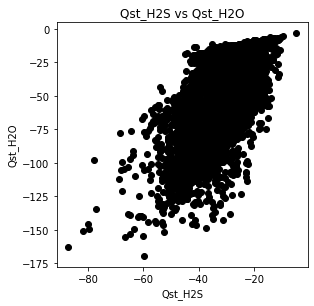

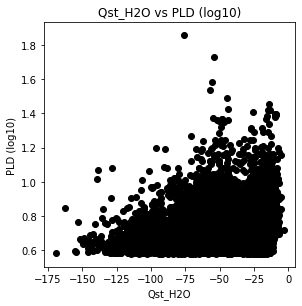

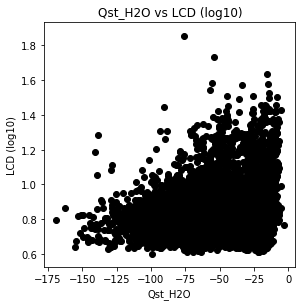

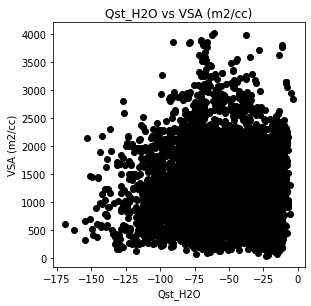

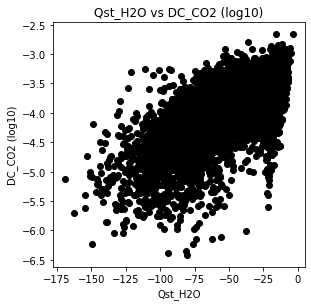

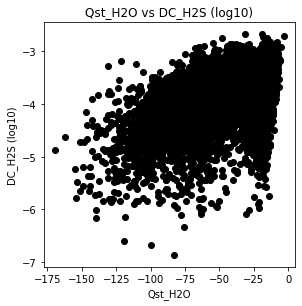

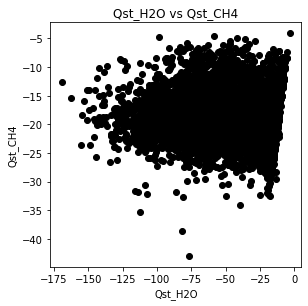

In [9]:
for d1 in list(data.columns)[1:]:
    for d2 in list(data.columns)[1:]:
        if d1 == d2:
            continue
        plot(d1, d2)

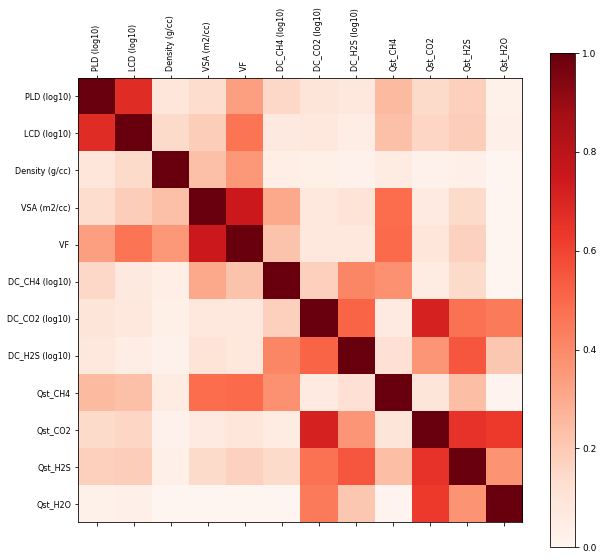

In [10]:
df_corr = corr_graph(data_descriptors, "")

In [11]:
df_corr=pd.DataFrame(data=np.array(df_corr),columns=["Descriptor 1","Descriptor 2","R2"])
df_corr=df_corr.sort_values(by="R2",ascending=False)
df_corr.head(40)

Descriptor 1    Descriptor 2        R2
7      VSA (m2/cc)             VF   0.747651
15  DC_CO2 (log10)         Qst_CO2  0.711979
0      PLD (log10)     LCD (log10)  0.677615
22         Qst_CO2         Qst_H2S  0.654924
23         Qst_CO2         Qst_H2O  0.629153
19  DC_H2S (log10)         Qst_H2S  0.552228
14  DC_CO2 (log10)  DC_H2S (log10)  0.512354
11             VF          Qst_CH4  0.495745
9      VSA (m2/cc)         Qst_CH4  0.491684
16  DC_CO2 (log10)         Qst_H2S  0.474968
3      LCD (log10)             VF   0.464835
17  DC_CO2 (log10)         Qst_H2O  0.449013
12  DC_CH4 (log10)  DC_H2S (log10)  0.413902
13  DC_CH4 (log10)         Qst_CH4  0.378045
24         Qst_H2S         Qst_H2O  0.368098
18  DC_H2S (log10)         Qst_CO2  0.364552
6   Density (g/cc)             VF   0.357513
1      PLD (log10)             VF   0.337903
8      VSA (m2/cc)  DC_CH4 (log10)  0.304763
2      PLD (log10)         Qst_CH4  0.251606
21         Qst_CH4         Qst_H2S  0.235177
4      LCD (log10)         Qst_CH4  0.233942
5   Density (g/cc)     VSA (m2/cc)  0.231579
10             VF   DC_CH4 (log10)  0.219067
20  DC_H2S (log10)         Qst_H2O  0.210435

## PCA Analysis

In [12]:
def get_PCA(data_raw, Descriptors):
    # scale data
    scaler = preprocessing.StandardScaler().fit(data_raw)
    data = scaler.transform(data_raw)
    # set up PCA with n_comp=n_desc
    pca = PCA(n_components=len(data[0]))
    # get components
    principalComponents = pca.fit_transform(data)
    # make into dataframe
    columns = []
    for x in range(len(data[0])):
        columns.append("PC" + str(x + 1))
    principalDf = pd.DataFrame(data=principalComponents, columns=columns)
    # get cumulative variance
    cum_scree = np.cumsum(pca.explained_variance_ratio_) * 100
    # get loadings
    loadings_df = pd.DataFrame(pca.components_.T, columns=columns)
    loadings_df.insert(0, "Descriptor", Descriptors)
    # merge in original data
    principalDf = pd.concat([principalDf, data_raw], axis=1)
    return principalDf, cum_scree, loadings_df

In [13]:
principalDf, cum_scree, loadings_df = get_PCA(data_descriptors, list(data.columns)[1:])

In [14]:
principalDf["names"] = data["MOF Name"].tolist()
fig = px.scatter(principalDf, x='PC1', y='PC2', title="PCA", hover_name="names", hover_data={"PC1": False, "PC2": False})
fig.show()

In [15]:
# round cum_scree data
cum_scree = [round(x, 2) for x in cum_scree]
# prepare data to plot scree plot
df_data = np.array([np.arange(1, len(cum_scree) + 1), cum_scree]).transpose()
cum_scree_df = pd.DataFrame(df_data, columns=["Component", "Variance"])
# make bar chart
fig = px.bar(cum_scree_df, x='Component', y='Variance', title="Cumulative Variance Described by Successive PCs",
                 hover_name="Variance", hover_data={"Component": False, "Variance": False})
fig.update_xaxes(dtick=1)
fig.update_yaxes(range=[0, 100])
fig.show()

In [16]:
fig = px.scatter(loadings_df, x='PC1', y='PC2', title="Loading of Descriptors in First Two PCs", hover_name="Descriptor")
fig.show()

## Euclidean Distance

In [17]:
scaler = preprocessing.StandardScaler().fit(data_descriptors)
data_descriptors_scaled = scaler.transform(data_descriptors)

In [18]:
master = []
for i in range(len(data_descriptors_scaled)):
    dist = []
    for j in range(len(data_descriptors_scaled)):
        if i == j:
            continue
        dist.append(distance.euclidean(data_descriptors_scaled[i], data_descriptors_scaled[j]))
    master.append(np.mean(dist))

In [19]:
dist_df = pd.DataFrame(data=np.transpose([data["MOF Name"], master]), columns=["Name", "Mean Distance"])
dist_df=dist_df.sort_values(by="Mean Distance",ascending=False)
dist_df.head(20)

Name Mean Distance
5307    UFEXIN_stripped.cif       12.6058
4577    RAVXOD_stripped.cif       12.1255
1568    FEWQIJ_stripped.cif       11.6575
1569    FEWQOP_stripped.cif       11.4634
3839    OLEYEL_stripped.cif       10.8819
4576    RAVXIX_stripped.cif       10.6085
365     BAZGAM_stripped.cif       10.5539
2774    KIPKEB_stripped.cif       10.3975
1542    FECKAA_stripped.cif        10.156
1562    FERWAC_stripped.cif       10.0575
4009    PADBAZ_stripped.cif       10.0286
5659    VIWKOD_stripped.cif       9.84663
5185    TOCJEC_stripped.cif       9.74159
4414    QIWGIO_stripped.cif       9.68796
249   AVAJUE02_stripped.cif       9.60763
1469    FALVOF_stripped.cif        9.5928
752     COKQOK_stripped.cif        9.5465
749     COKPUP_stripped.cif       9.49238
1470  FALVOF01_stripped.cif        9.3685
6119    XAHQAA_stripped.cif       9.23943